# Polynomial Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    "Input": [i for i in range(100)],
    "Output": [3 * i**2 + 5 * i**3 for i in range(100)],
}

In [3]:
dataset = pd.DataFrame(data)
dataset.head(3)

,Input,Output
0,0,0
1,1,8
2,2,52


In [4]:
# Check and remove null values
dataset.isnull().sum()

Input     0
Output    0
dtype: int64

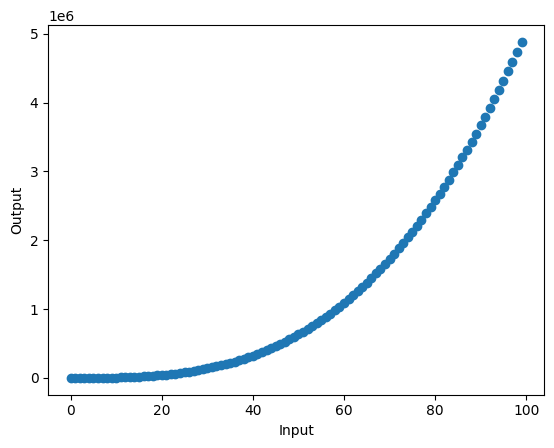

'Polynomial relation found!'

In [5]:
# Visualize data
plt.scatter(dataset["Input"], dataset["Output"])
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

'''Polynomial relation found!'''

In [6]:
# Check correlation
dataset.corr() # Highly correlated

,Input,Output
Input,1.000000,0.915925
Output,0.915925,1.000000


In [7]:
# Select input and output data
x = dataset[["Input"]] # Two dimensional
y = dataset["Output"] # One dimensional

In [8]:
# Convert the data to polynomial nature
from sklearn.preprocessing import PolynomialFeatures

In [9]:
pf = PolynomialFeatures(degree=3) # degree is max power of x which you want to follow
pf.fit(x)
x = pf.transform(x) # Returns an array (2D)

In [10]:
# Train test split
from sklearn.model_selection import train_test_split

In [11]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# Build the polynomial model
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
# Test the model
lr.score(x_test, y_test)

1.0

In [15]:
# New pridctions
lr.predict(pf.transform([[123]])) # New data should be in polynomial form

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([9349721.99999999])

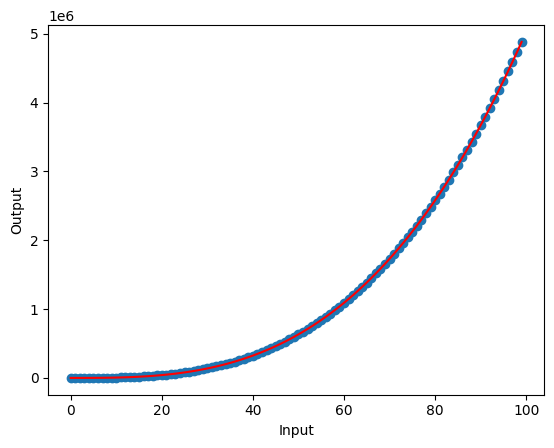

In [16]:
# Visualize prediction line
plt.scatter(dataset["Input"], dataset["Output"])
plt.plot(dataset["Input"], lr.predict(pf.transform(dataset[["Input"]])), color="red")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()